# Bibliotecas

In [1]:
# Instalación de biblioteca para trabajar con imágenes satelitales
!pip install rasterio

     |████████████████████████████████| 19.3 MB 38 kB/s 


# Sobre la imágenes satelitales

La imagen que trabajaremos fue obtenida por la misión [Sentinel-2](https://sentinel.esa.int/web/sentinel/missions/sentinel-2) llevada acabo por la ESA. 

El archivo `CUraster.tif` es un recorte de la imagen del día 21-07-2021. La imagen tampoco contiene todas las bandas de información que contiene una imagen de Sentinel-2, solo contiene la información del las bandas 8 (cercano al infrarojo), 4 (roja), 3 (verde) y 2 (azul).

Nuestro objetivo será calcular el índice NDVI (_Normalized difference vegetation index_) el cual para las imágenes Sentinel-2 se define como: 

$$
\textrm{NDVI}=\frac{B8-B4}{B8+B4}=\frac{\textrm{NIR}-\textrm{RED}}{\textrm{NIR}+\textrm{RED}}
$$

Entonces $-1\leq\textrm{NDVI}\leq 1$

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import rasterio

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [5]:
IMG_PATH = '/gdrive/My Drive/ColabData/CUraster.tif'

In [7]:
with rasterio.open(IMG_PATH) as img:
    cu_array = img.read()

print(type(cu_array))

<class 'numpy.ndarray'>


In [8]:
print(cu_array.shape)

(4, 340, 338)


In [16]:
cu_band8 = cu_array[0, :, :]

In [17]:
print(cu_band8.shape)

(340, 338)


In [18]:
cu_band4 = cu_array[1, :, :]

In [19]:
print(cu_band4.shape)

(340, 338)


In [20]:
diff = cu_band8 - cu_band4

In [21]:
print(diff)

[[ 113  242  217 ...    0    0    0]
 [ 288  805  319 ...  944  510  570]
 [ 536 1109  503 ...  838  308  351]
 ...
 [1286 1545 1679 ...   67  348  433]
 [1390 1514 1402 ...  743 1225 1216]
 [1327 1855  818 ... 1811 1892 1766]]


In [22]:
print(diff.shape)

(340, 338)


In [24]:
a = np.ones((2, 3))
b = np.ones((2, 3))
print('arreglo a\n', a)
print('arreglo b\n', b)

arreglo a
 [[1. 1. 1.]
 [1. 1. 1.]]
arreglo b
 [[1. 1. 1.]
 [1. 1. 1.]]


In [25]:
print(a-b)

[[0. 0. 0.]
 [0. 0. 0.]]


In [26]:
suma = cu_band8 + cu_band4

In [27]:
print(suma)

[[2229 4430 5665 ...    0    0    0]
 [1716 3493 4663 ... 4364 5406 3570]
 [1636 3125 3771 ... 4190 5148 3279]
 ...
 [2708 2451 2595 ... 2167 3352 6365]
 [2972 2598 2666 ... 2777 3341 5200]
 [2661 2891 3102 ... 3051 3520 5070]]


In [28]:
ndvi = diff / suma

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [29]:
print(ndvi.shape)

(340, 338)


In [30]:
print(ndvi)

[[0.05069538 0.05462754 0.03830538 ...        nan        nan        nan]
 [0.16783217 0.23046092 0.06841089 ... 0.21631531 0.09433962 0.15966387]
 [0.32762836 0.35488    0.13338637 ... 0.2        0.05982906 0.10704483]
 ...
 [0.47488922 0.63035496 0.64701349 ... 0.03091832 0.10381862 0.06802828]
 [0.46769852 0.58275597 0.52588147 ... 0.26755492 0.36665669 0.23384615]
 [0.4986847  0.64164649 0.26370084 ... 0.59357588 0.5375     0.34832347]]


In [31]:
suma[suma == 0] = 1

In [32]:
ndvi = diff / suma

In [33]:
print(ndvi.shape)

(340, 338)


In [34]:
print(ndvi)

[[0.05069538 0.05462754 0.03830538 ... 0.         0.         0.        ]
 [0.16783217 0.23046092 0.06841089 ... 0.21631531 0.09433962 0.15966387]
 [0.32762836 0.35488    0.13338637 ... 0.2        0.05982906 0.10704483]
 ...
 [0.47488922 0.63035496 0.64701349 ... 0.03091832 0.10381862 0.06802828]
 [0.46769852 0.58275597 0.52588147 ... 0.26755492 0.36665669 0.23384615]
 [0.4986847  0.64164649 0.26370084 ... 0.59357588 0.5375     0.34832347]]


In [35]:
print(ndvi.max())

109.22


In [36]:
print(ndvi.min())

0.0


In [37]:
np.where(ndvi == 109.22)

(array([19]), array([119]))

In [38]:
ndvi[19, 119]

109.22

In [39]:
cu_band8[19, 119]

298

In [40]:
cu_band4[19, 119]

302

In [41]:
(298 - 302)/(298+302)

-0.006666666666666667

In [42]:
print(cu_band8.dtype)

uint16


In [43]:
print(cu_band4.dtype)

uint16


In [44]:
# Cambio el tipo de los arreglos de las bandas a float64
cu_band8 = cu_band8.astype('float64')
cu_band4 = cu_band4.astype('float64')

# Operaciones para el NDVI
diff = cu_band8-cu_band4
suma = cu_band8+cu_band4
suma[suma == 0] = 1
ndvi = diff / suma

In [45]:
print(ndvi.shape)

(340, 338)


In [46]:
print(ndvi.max())

0.9005834305717619


In [47]:
print(ndvi.min())

-0.30111524163568776


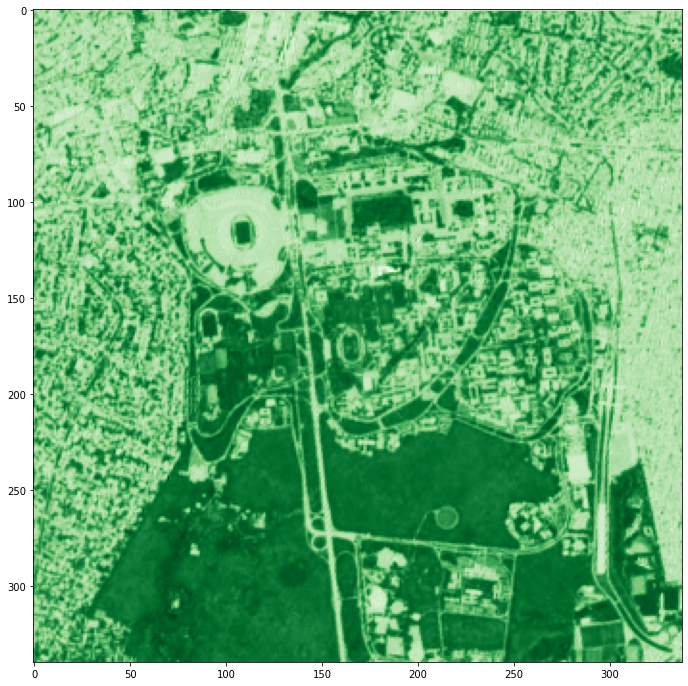

In [49]:
plt.figure(figsize = (12, 12))
plt.imshow(ndvi, cmap='Greens')